In [86]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
data=pd.read_csv("dataset_investing_stock_market.csv", encoding="ISO-8859-1", sep=';', header=0)
data

,No,Classes,Text
0,1,GOOD,PARIS (Reuters) -French carmaker Renault (EPA:...
1,2,BAD,"(Reuters) - Russia may face an ""orchestrated"" ..."
2,3,BAD,European stock markets traded sharply lower Fr...
3,4,BAD,Swedish truck maker AB Volvo reported a surpri...
4,5,BAD,AB InBev (EBR:ABI) stock fell in early trading...
...,...,...,...
195,196,GOOD,Shares in defense group Thales (PA:TCFP) rose ...
196,197,NEUTRAL,The head of Japan's Hitachi Ltd (T:6501) said ...
197,198,GOOD,US stocks rallied on Friday amid renewed optim...
198,199,BAD,"European shares inched lower on Friday, weighe..."


In [88]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


In [89]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

# tokenize all rows - create a new column 
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords']=data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,No,Classes,Text,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,1,GOOD,PARIS (Reuters) -French carmaker Renault (EPA:...,PARIS Reuters French carmaker Renault EPARENA ...,paris reuters french carmaker renault eparena ...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,paris reuters french carmaker renault eparena ...
1,2,BAD,"(Reuters) - Russia may face an ""orchestrated"" ...",Reuters Russia may face an orchestrated defau...,reuters russia may face an orchestrated defau...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,reuters russia may face an orchestrated defau...
2,3,BAD,European stock markets traded sharply lower Fr...,European stock markets traded sharply lower Fr...,european stock markets traded sharply lower fr...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,european stock markets traded sharply lower fr...
3,4,BAD,Swedish truck maker AB Volvo reported a surpri...,Swedish truck maker AB Volvo reported a surpri...,swedish truck maker ab volvo reported a surpri...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,swedish truck maker ab volvo reported a surpri...
4,5,BAD,AB InBev (EBR:ABI) stock fell in early trading...,AB InBev EBRABI stock fell in early trading in...,ab inbev ebrabi stock fell in early trading in...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,ab inbev ebrabi stock fell in early trading in...


In [90]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

In [91]:
v = CountVectorizer()
X = v.fit_transform(data['msg_lemmatized_string'])
y = data['Classes'].to_list()
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [92]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 2454)	1
  (0, 3724)	1
  (0, 5042)	4
  (0, 2823)	1
  (0, 3695)	1
  (0, 5436)	1
  (0, 2941)	1
  (0, 1029)	1
  (0, 5471)	1
  (0, 951)	3
  (0, 2371)	1
  (0, 860)	1
  (0, 2332)	2
  (0, 1366)	1
  (0, 5396)	2
  (0, 1990)	3
  (0, 3432)	1
  (0, 778)	1
  (0, 3414)	1
  (0, 5085)	1
  (0, 929)	1
  (0, 2182)	1
  (0, 2556)	1
  (0, 3094)	1
  (0, 1034)	1
  :	:
  (139, 4602)	1
  (139, 4301)	1
  (139, 3882)	1
  (139, 1103)	1
  (139, 3445)	1
  (139, 3427)	1
  (139, 4543)	1
  (139, 1677)	1
  (139, 3189)	1
  (139, 5378)	1
  (139, 4214)	1
  (139, 3156)	1
  (139, 3299)	3
  (139, 3957)	1
  (139, 1219)	1
  (139, 4644)	1
  (139, 3165)	1
  (139, 4331)	1
  (139, 5403)	1
  (139, 4798)	1
  (139, 3645)	1
  (139, 2292)	1
  (139, 755)	1
  (139, 3103)	1
  (139, 4419)	1
  (0, 4452)	2
  (0, 3724)	1
  (0, 2458)	1
  (0, 5040)	3
  (0, 5042)	18
  (0, 2407)	3
  (0, 2953)	1
  (0, 2823)	6
  (0, 3695)	6
  (0, 5099)	5
  (0, 2460)	1
  (0, 1029)	2
  (0, 2950)	1
  (0, 5471)	1
  (0, 951)	2
  (0, 4903)	1
  (0, 2697)	1
  (0, 946)	

In [93]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000).fit(X_train, y_train)
y_pred=clf.predict(X_test)

Accuracy of training set:                   : 1.000
Accuracy                                    : 0.567
F1-Score                                    : 0.562
Precision                                   : 0.561
Recall                                      : 0.567


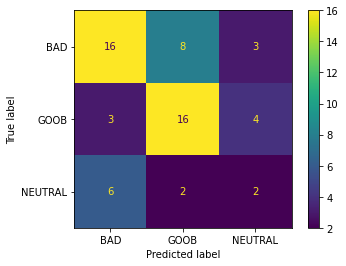

In [94]:
# Scores
print('Accuracy of training set:                   : {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy                                    : %.3f'%accuracy_score(y_test, y_pred))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision                                   : %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall                                      : %.3f'%recall_score(y_test, y_pred, average="weighted"))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_dist={
    'average': [True, False],
}

In [97]:
grid=GridSearchCV(clf,param_grid=param_dist,cv=5,n_jobs=-1)

In [98]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'average': [True, False]})

In [99]:
grid.best_estimator_

SGDClassifier()

In [100]:
grid.best_score_

0.6285714285714287

In [101]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000,average=True)

In [102]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(clf, X, y, cv=5,scoring=scoring)
scores

C:\Users\George\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.00398898, 0.0039897 , 0.00398922, 0.00299215, 0.00398922]),
 'score_time': array([0.00299239, 0.00199437, 0.0009973 , 0.00202346, 0.00199366]),
 'test_accuracy': array([0.675, 0.75 , 0.5  , 0.625, 0.6  ]),
 'test_f1_macro': array([0.49473684, 0.72268519, 0.47377622, 0.51746566, 0.57989418]),
 'test_precision_macro': array([0.45622896, 0.72611833, 0.48888889, 0.56111111, 0.5976431 ]),
 'test_recall_macro': array([0.54534314, 0.7429972 , 0.50910364, 0.53658964, 0.59366246])}

In [103]:
data2=pd.read_excel("merged_stock_market.xlsx")
data2

,Text,Field1
0,Victoria's Secret & Co. Shares Surge 7% on Q1...,"May 31, 2022 05:17PM ET"
1,HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,"May 31, 2022 05:13PM ET"
2,© Reuters Salesforce Shares Jump 6% on Q1 Earn...,"May 31, 2022 05:11PM ET"
3,"HP Inc Earnings, Revenue Beat in Q2\n\nBy Yas...","May 31, 2022 05:07PM ET"
4,FILE PHOTO: The logo of Swiss bank Credit Sui...,"May 31, 2022 05:06PM ET"
...,...,...
66012,By Huw Jones\n\nLONDON (Reuters) - Auditors ar...,"Oct 04, 2019 04:11AM ET"
66013,FILE PHOTO: A man takes pictures inside a Nor...,"Oct 04, 2019 03:51AM ET"
66014,Apple Is Raising IPhone 11 Output by Up to 10...,"Oct 04, 2019 03:41AM ET"
66015,(Bloomberg) -- India stocks erased early gains...,"Oct 04, 2019 03:39AM ET"


In [104]:
data2['Text'] = data2['Text'].astype(str)
data2

,Text,Field1
0,Victoria's Secret & Co. Shares Surge 7% on Q1...,"May 31, 2022 05:17PM ET"
1,HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,"May 31, 2022 05:13PM ET"
2,© Reuters Salesforce Shares Jump 6% on Q1 Earn...,"May 31, 2022 05:11PM ET"
3,"HP Inc Earnings, Revenue Beat in Q2\n\nBy Yas...","May 31, 2022 05:07PM ET"
4,FILE PHOTO: The logo of Swiss bank Credit Sui...,"May 31, 2022 05:06PM ET"
...,...,...
66012,By Huw Jones\n\nLONDON (Reuters) - Auditors ar...,"Oct 04, 2019 04:11AM ET"
66013,FILE PHOTO: A man takes pictures inside a Nor...,"Oct 04, 2019 03:51AM ET"
66014,Apple Is Raising IPhone 11 Output by Up to 10...,"Oct 04, 2019 03:41AM ET"
66015,(Bloomberg) -- India stocks erased early gains...,"Oct 04, 2019 03:39AM ET"


In [105]:
# data preprocess

# remove punctuation from Text column - create a new column 
data2['clean_msg']=data2['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data2['msg_lower']=data2['clean_msg'].apply(lambda x: x.lower())

import gensim
data2['no_stopwords']=data2['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data2['no_stopwords2']=data2['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data2['msg_stemmed']=data2['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data2['msg_lemmatized']=data2['msg_stemmed'].apply(lambda x:lemmatizer(x))

data2['msg_lemmatized_string']=data2['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data2.head()

,Text,Field1,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,Victoria's Secret & Co. Shares Surge 7% on Q1...,"May 31, 2022 05:17PM ET",Victorias Secret Co Shares Surge 7 on Q1 Ear...,victorias secret co shares surge 7 on q1 ear...,"[victorias, secret, co, shares, surge, on, ear...","[victorias, secret, co, shares, surge, earning...","[victoria, secret, co, share, surg, earn, beat...","[victoria, secret, co, share, surg, earn, beat...",victoria secret co share surg earn beat davit ...
1,HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,"May 31, 2022 05:13PM ET",HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,hp gains on q2 earnings beat and raise\n\nby ...,"[hp, gains, on, earnings, beat, and, raise, by...","[hp, gains, earnings, beat, raise, davit, kira...","[hp, gain, earn, beat, rais, davit, kirakosyan...","[hp, gain, earn, beat, rais, davit, kirakosyan...",hp gain earn beat rais davit kirakosyan hp inc...
2,© Reuters Salesforce Shares Jump 6% on Q1 Earn...,"May 31, 2022 05:11PM ET",© Reuters Salesforce Shares Jump 6 on Q1 Earni...,© reuters salesforce shares jump 6 on q1 earni...,"[reuters, salesforce, shares, jump, on, earnin...","[reuters, salesforce, shares, jump, earnings, ...","[reuter, salesforc, share, jump, earn, beat, d...","[reuter, salesforc, share, jump, earn, beat, d...",reuter salesforc share jump earn beat davit ki...
3,"HP Inc Earnings, Revenue Beat in Q2\n\nBy Yas...","May 31, 2022 05:07PM ET",HP Inc Earnings Revenue Beat in Q2\n\nBy Yasi...,hp inc earnings revenue beat in q2\n\nby yasi...,"[hp, inc, earnings, revenue, beat, in, by, yas...","[hp, inc, earnings, revenue, beat, yasin, ebra...","[hp, inc, earn, revenu, beat, yasin, ebrahim, ...","[hp, inc, earn, revenu, beat, yasin, ebrahim, ...",hp inc earn revenu beat yasin ebrahim investin...
4,FILE PHOTO: The logo of Swiss bank Credit Sui...,"May 31, 2022 05:06PM ET",FILE PHOTO The logo of Swiss bank Credit Suis...,file photo the logo of swiss bank credit suis...,"[file, photo, the, logo, of, swiss, bank, cred...","[file, photo, logo, swiss, bank, credit, suiss...","[file, photo, logo, swiss, bank, credit, suiss...","[file, photo, logo, swiss, bank, credit, suiss...",file photo logo swiss bank credit suiss seen h...


In [106]:
X2 = v.transform(data2['msg_lemmatized_string'])
print(X2)

  (0, 829)	1
  (0, 1024)	1
  (0, 1116)	1
  (0, 1146)	1
  (0, 1169)	1
  (0, 1208)	2
  (0, 1224)	1
  (0, 1449)	1
  (0, 1554)	2
  (0, 1571)	1
  (0, 1575)	1
  (0, 1590)	4
  (0, 1647)	3
  (0, 1775)	2
  (0, 2033)	2
  (0, 2103)	1
  (0, 2243)	1
  (0, 2246)	2
  (0, 2412)	1
  (0, 2550)	1
  (0, 2597)	1
  (0, 2665)	1
  (0, 2695)	1
  (0, 2697)	1
  (0, 3074)	1
  :	:
  (66015, 5512)	1
  (66016, 912)	1
  (66016, 1507)	1
  (66016, 2065)	1
  (66016, 2275)	1
  (66016, 2371)	1
  (66016, 2458)	1
  (66016, 2746)	3
  (66016, 2901)	1
  (66016, 3039)	3
  (66016, 3062)	2
  (66016, 3086)	1
  (66016, 3095)	2
  (66016, 3245)	1
  (66016, 3283)	1
  (66016, 3437)	1
  (66016, 3554)	1
  (66016, 4004)	2
  (66016, 4125)	1
  (66016, 4452)	1
  (66016, 4984)	1
  (66016, 5090)	1
  (66016, 5165)	1
  (66016, 5500)	1
  (66016, 5512)	1


In [107]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000,average=True)
svm=clf.fit(X_train,y_train)
pred=clf.predict(X2)

In [108]:
pred

array(['GOOD', 'GOOD', 'GOOD', ..., 'GOOD', 'BAD', 'BAD'], dtype='<U7')

In [109]:
data2['Sentiment']=pd.Series(pred)

In [110]:
data2

,Text,Field1,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string,Sentiment
0,Victoria's Secret & Co. Shares Surge 7% on Q1...,"May 31, 2022 05:17PM ET",Victorias Secret Co Shares Surge 7 on Q1 Ear...,victorias secret co shares surge 7 on q1 ear...,"[victorias, secret, co, shares, surge, on, ear...","[victorias, secret, co, shares, surge, earning...","[victoria, secret, co, share, surg, earn, beat...","[victoria, secret, co, share, surg, earn, beat...",victoria secret co share surg earn beat davit ...,GOOD
1,HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,"May 31, 2022 05:13PM ET",HP Gains on Q2 Earnings Beat and Raise\n\nBy ...,hp gains on q2 earnings beat and raise\n\nby ...,"[hp, gains, on, earnings, beat, and, raise, by...","[hp, gains, earnings, beat, raise, davit, kira...","[hp, gain, earn, beat, rais, davit, kirakosyan...","[hp, gain, earn, beat, rais, davit, kirakosyan...",hp gain earn beat rais davit kirakosyan hp inc...,GOOD
2,© Reuters Salesforce Shares Jump 6% on Q1 Earn...,"May 31, 2022 05:11PM ET",© Reuters Salesforce Shares Jump 6 on Q1 Earni...,© reuters salesforce shares jump 6 on q1 earni...,"[reuters, salesforce, shares, jump, on, earnin...","[reuters, salesforce, shares, jump, earnings, ...","[reuter, salesforc, share, jump, earn, beat, d...","[reuter, salesforc, share, jump, earn, beat, d...",reuter salesforc share jump earn beat davit ki...,GOOD
3,"HP Inc Earnings, Revenue Beat in Q2\n\nBy Yas...","May 31, 2022 05:07PM ET",HP Inc Earnings Revenue Beat in Q2\n\nBy Yasi...,hp inc earnings revenue beat in q2\n\nby yasi...,"[hp, inc, earnings, revenue, beat, in, by, yas...","[hp, inc, earnings, revenue, beat, yasin, ebra...","[hp, inc, earn, revenu, beat, yasin, ebrahim, ...","[hp, inc, earn, revenu, beat, yasin, ebrahim, ...",hp inc earn revenu beat yasin ebrahim investin...,GOOD
4,FILE PHOTO: The logo of Swiss bank Credit Sui...,"May 31, 2022 05:06PM ET",FILE PHOTO The logo of Swiss bank Credit Suis...,file photo the logo of swiss bank credit suis...,"[file, photo, the, logo, of, swiss, bank, cred...","[file, photo, logo, swiss, bank, credit, suiss...","[file, photo, logo, swiss, bank, credit, suiss...","[file, photo, logo, swiss, bank, credit, suiss...",file photo logo swiss bank credit suiss seen h...,BAD
...,...,...,...,...,...,...,...,...,...,...
66012,By Huw Jones\n\nLONDON (Reuters) - Auditors ar...,"Oct 04, 2019 04:11AM ET",By Huw Jones\n\nLONDON Reuters Auditors are b...,by huw jones\n\nlondon reuters auditors are b...,"[by, huw, jones, london, reuters, auditors, ar...","[huw, jones, london, reuters, auditors, blamed...","[huw, jone, london, reuter, auditor, blame, mu...","[huw, jone, london, reuter, auditor, blame, mu...",huw jone london reuter auditor blame much comp...,NEUTRAL
66013,FILE PHOTO: A man takes pictures inside a Nor...,"Oct 04, 2019 03:51AM ET",FILE PHOTO A man takes pictures inside a Norw...,file photo a man takes pictures inside a norw...,"[file, photo, man, takes, pictures, inside, no...","[file, photo, man, takes, pictures, inside, no...","[file, photo, man, take, pictur, insid, norweg...","[file, photo, man, take, pictur, insid, norweg...",file photo man take pictur insid norwegian air...,GOOD
66014,Apple Is Raising IPhone 11 Output by Up to 10...,"Oct 04, 2019 03:41AM ET",Apple Is Raising IPhone 11 Output by Up to 10...,apple is raising iphone 11 output by up to 10...,"[apple, is, raising, iphone, output, by, up, t...","[apple, raising, iphone, output, nikkei, says,...","[appl, rais, iphon, output, nikkei, say, bloom...","[appl, rais, iphon, output, nikkei, say, bloom...",appl rais iphon output nikkei say bloomberg ap...,GOOD
66015,(Bloomberg) -- India stocks erased early gains...,"Oct 04, 2019 03:39AM ET",Bloomberg India stocks erased early gains aft...,bloomberg india stocks erased early gains aft...,"[bloomberg, india, stocks, erased, early, gain...","[bloomberg, india, stocks, erased, early, gain...","[bloomberg, india, stock, eras

In [111]:
file_name = 'count_sgd.xlsx'
  
# saving the excelsheet
data2.to_excel(file_name)